### Business Problem ;-

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
# importing necesarry lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading/importing dataset
data = pd.read_csv('walmart_data.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# Making copy of dataset for analysis
wal_data=data.copy()
wal_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
# No of rows
wal_data.shape[0]

550068

In [ ]:
# No of col
wal_data.shape[1]

10

In [ ]:
## Getting complete rows,columns and data-types of data
wal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


* As we can see Occupation,Marital_Status,Product_Category has interger data-type

In [ ]:
## Checking/Confirming size of data
wal_data.shape

(550068, 10)

In [ ]:
# It give 5 point only statistical data summary
wal_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


#### Need to change data-type(int to object) of - Occupation, Marital_Status, Product_Category

In [ ]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
wal_data[cols] = wal_data[cols].astype('object')

In [ ]:
wal_data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
# It give 5 point only statistical data summary
wal_data.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
# It give 5 point summary including object and statstical data
wal_data.describe(include = object)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
# Checking null value
wal_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

* There are no missing values in dataset

#### How many users are there in the dataset?

In [ ]:
wal_data['User_ID'].nunique()

5891

In [ ]:
wal_data['Product_ID'].nunique()

3631

In [ ]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
wal_data[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(
wal_data)*100

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Occupation                 0      12.659889
                           1       8.621843
                           2       4.833584
                           3       3.208694
                           4      13.145284
                           5       2.213726
                           6       3.700452
                           7      10.750125
                           8       0.281056
                           9       1.143677
                           10      2.350618
                           11      2.106285
                           12      5.668208
                           13      1.404917
                           14      4.964659
                           15      2.211545
                           16      4.612339
                           17      7.279645
                           18      1.203851
                           19      1.538173
                           20      6.101427
Product_Category           1      25.520118
                           2       4.338373
                           3       3.674637
                           4       2.136645
                           5      27.438971
                           6       3.720631
                           7       0.676462
                           8      20.711076
                           9       0.074536
                           10      0.931703
                           11      4.415272
                           12      0.717548
                           13      1.008784
                           14      0.276875
                           15      1.143495
                           16      1.786688
                           17      0.105078
                           18      0.568112
                           19      0.291419
                           20      0.463579
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

#### Checking value count

In [ ]:
wal_data.value_counts().sum()

550068

#### Univariate Analysis

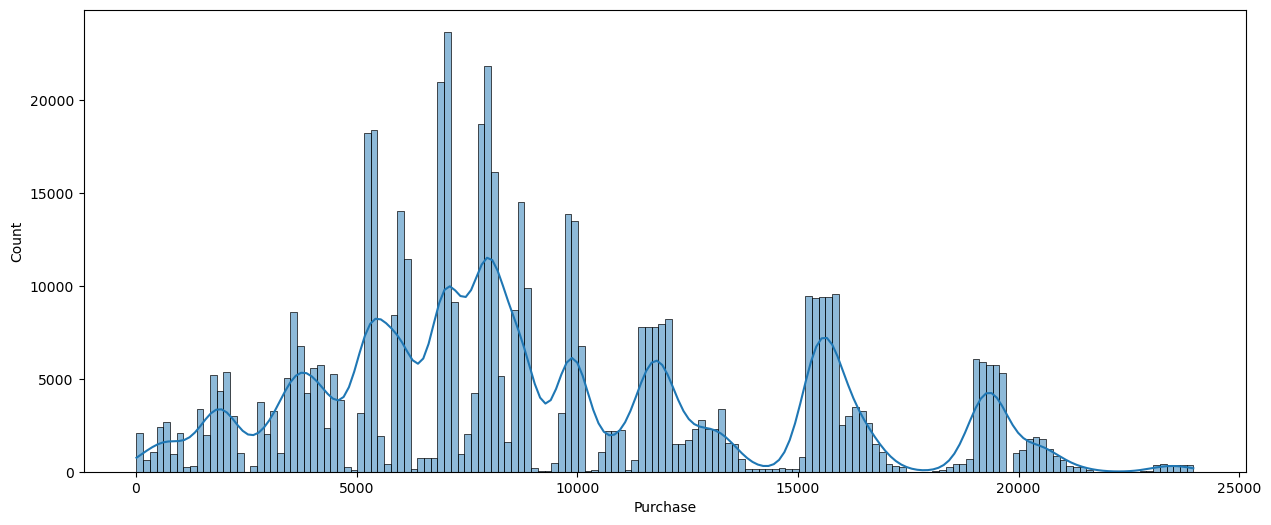

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data=wal_data, x='Purchase', kde=True)
plt.show()

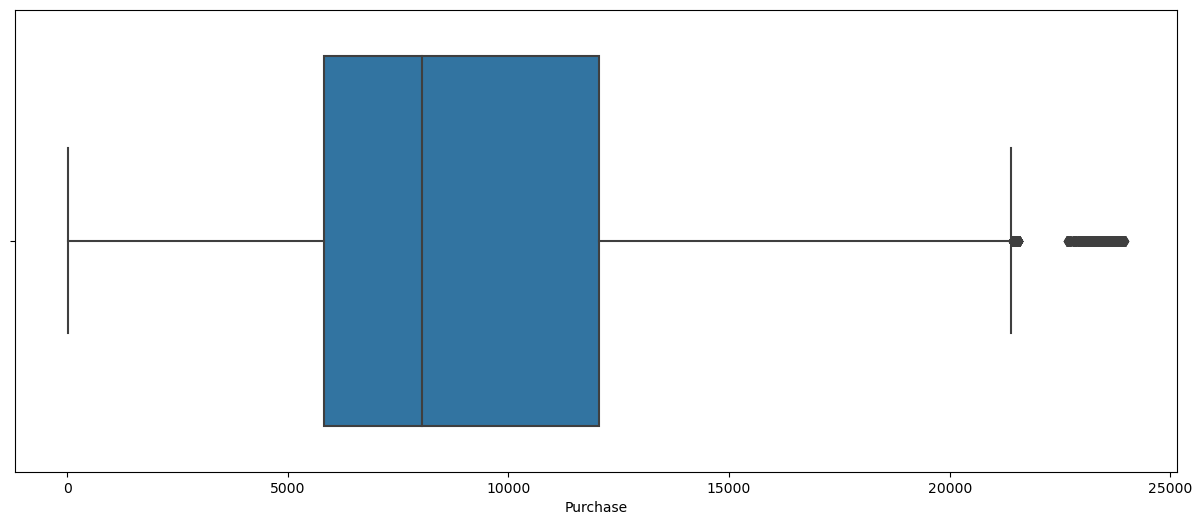

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=wal_data, x='Purchase', orient='h')
plt.show()

* Purchase has outliers data

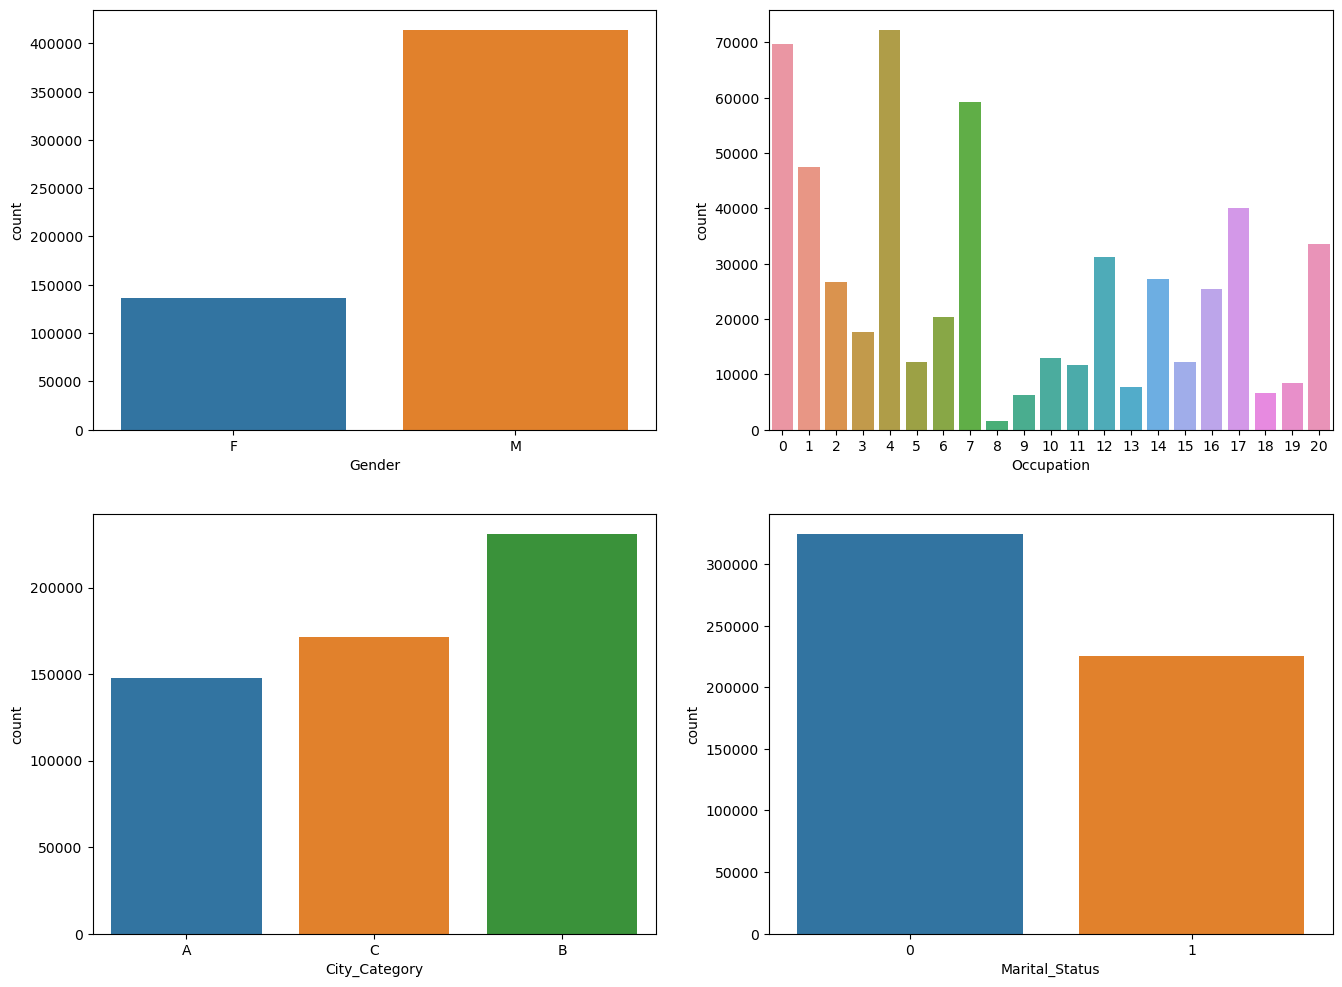

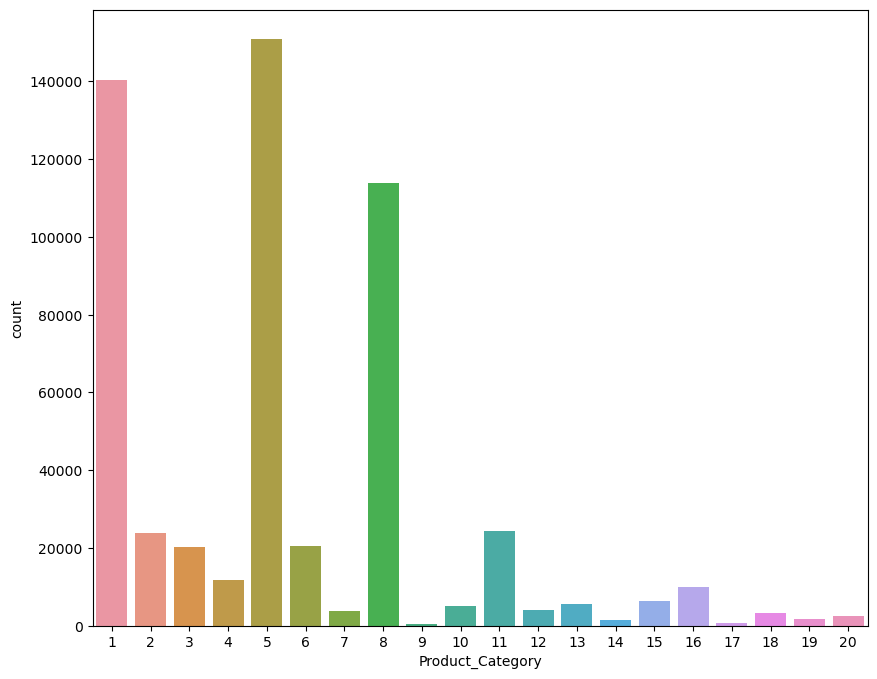

In [ ]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=wal_data, x='Gender', ax=axs[0,0])
sns.countplot(data=wal_data, x='Occupation', ax=axs[0,1])
sns.countplot(data=wal_data, x='City_Category', ax=axs[1,0])
sns.countplot(data=wal_data, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=wal_data, x='Product_Category')
plt.show()

* Male customer are more as compare to female
* There are total 20 different types of Occupation and Product category
* Most of customer belong to B city as compare to other
* Most of customer are single
* Product Category - 1, 5, 8, & 11 have highest purchasing frequency.

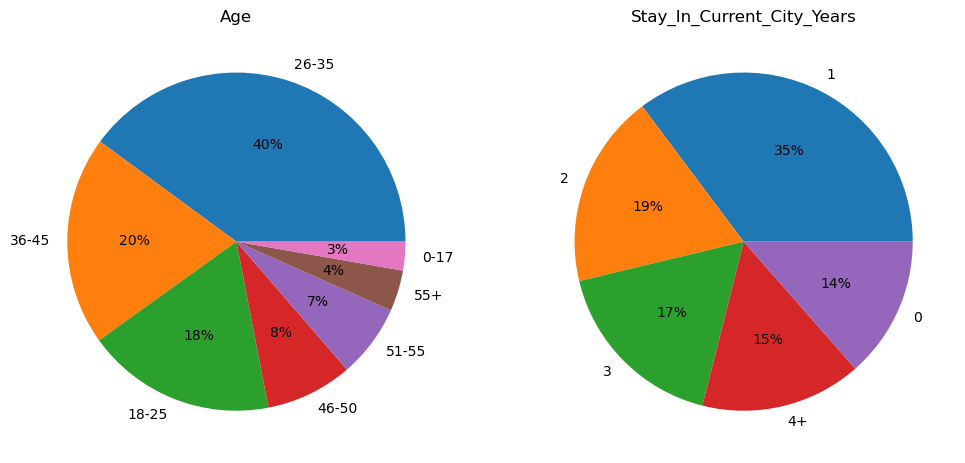

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = wal_data['Age'].value_counts(normalize=True)*100
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%')
axs[0].set_title("Age")

data = wal_data['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%')
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()



* 40% are customer are 26-35 age group
* highest 35% customer are living in same city since 1 year

### Bi-variate Analysis

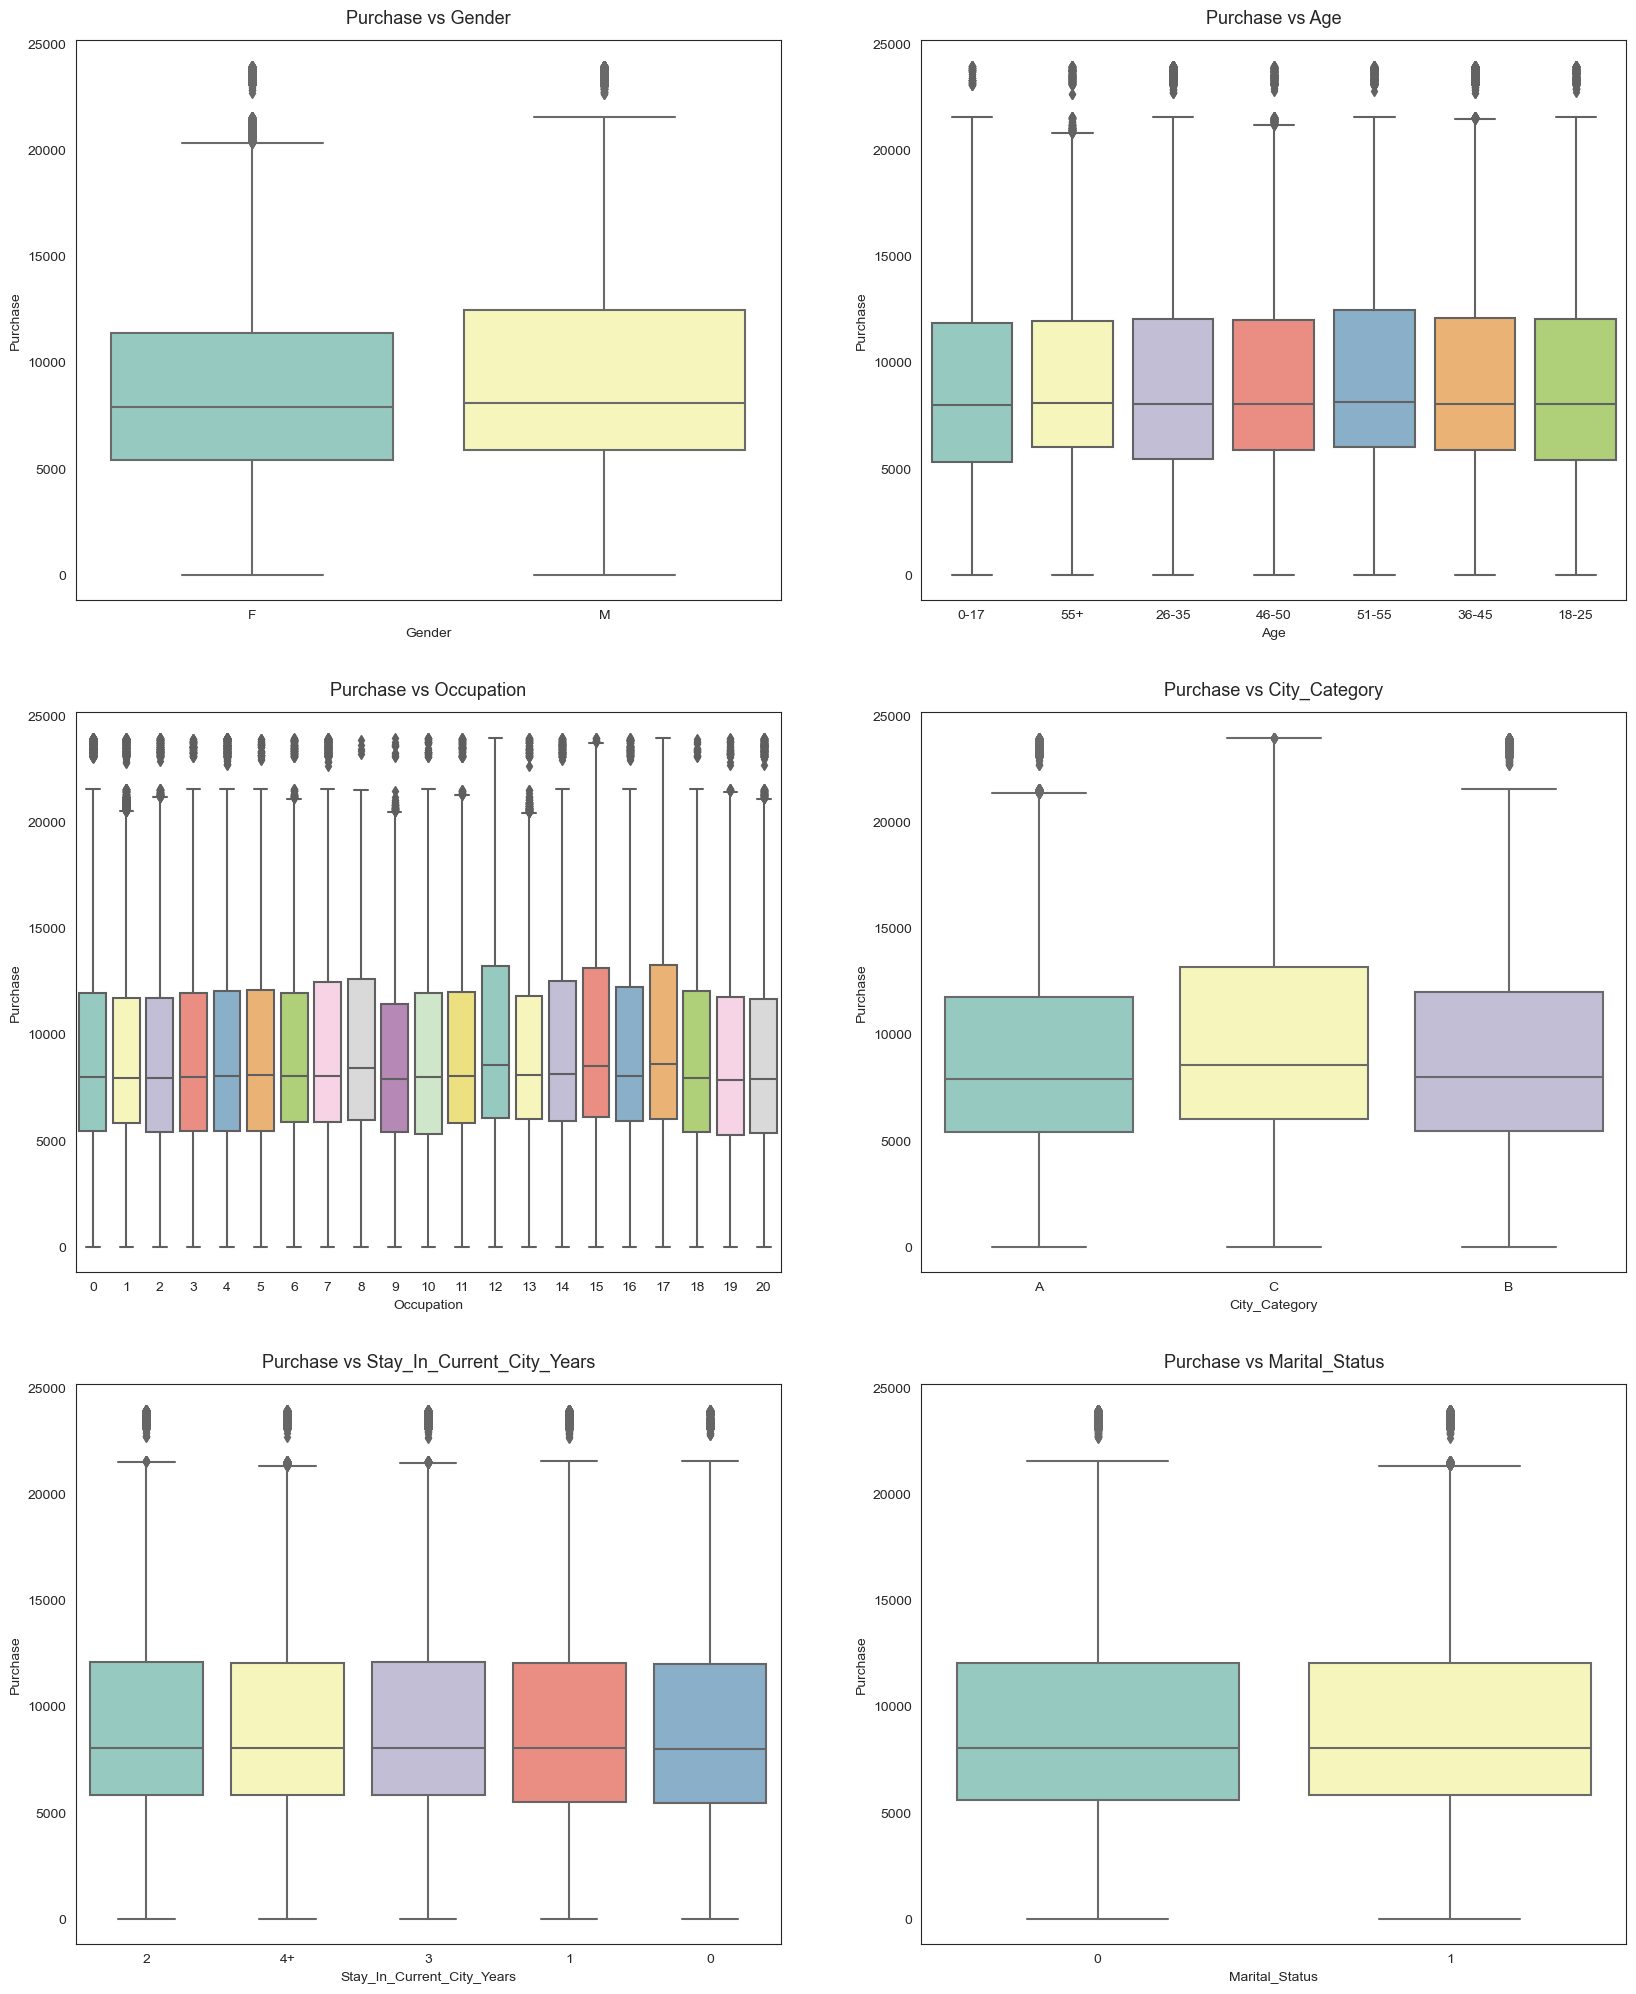

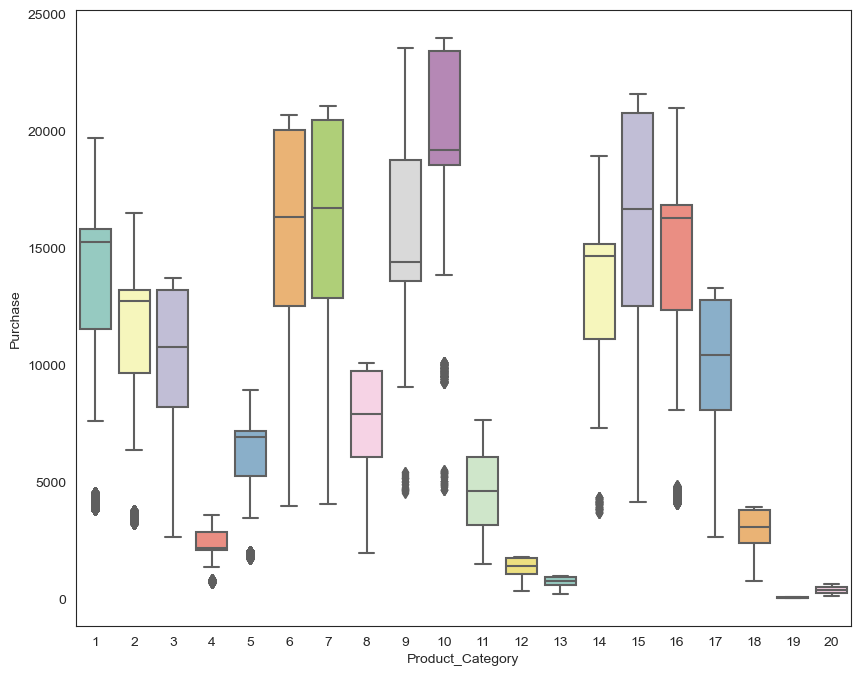

In [ ]:

attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=wal_data, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=wal_data, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

### Multivariate Analysis

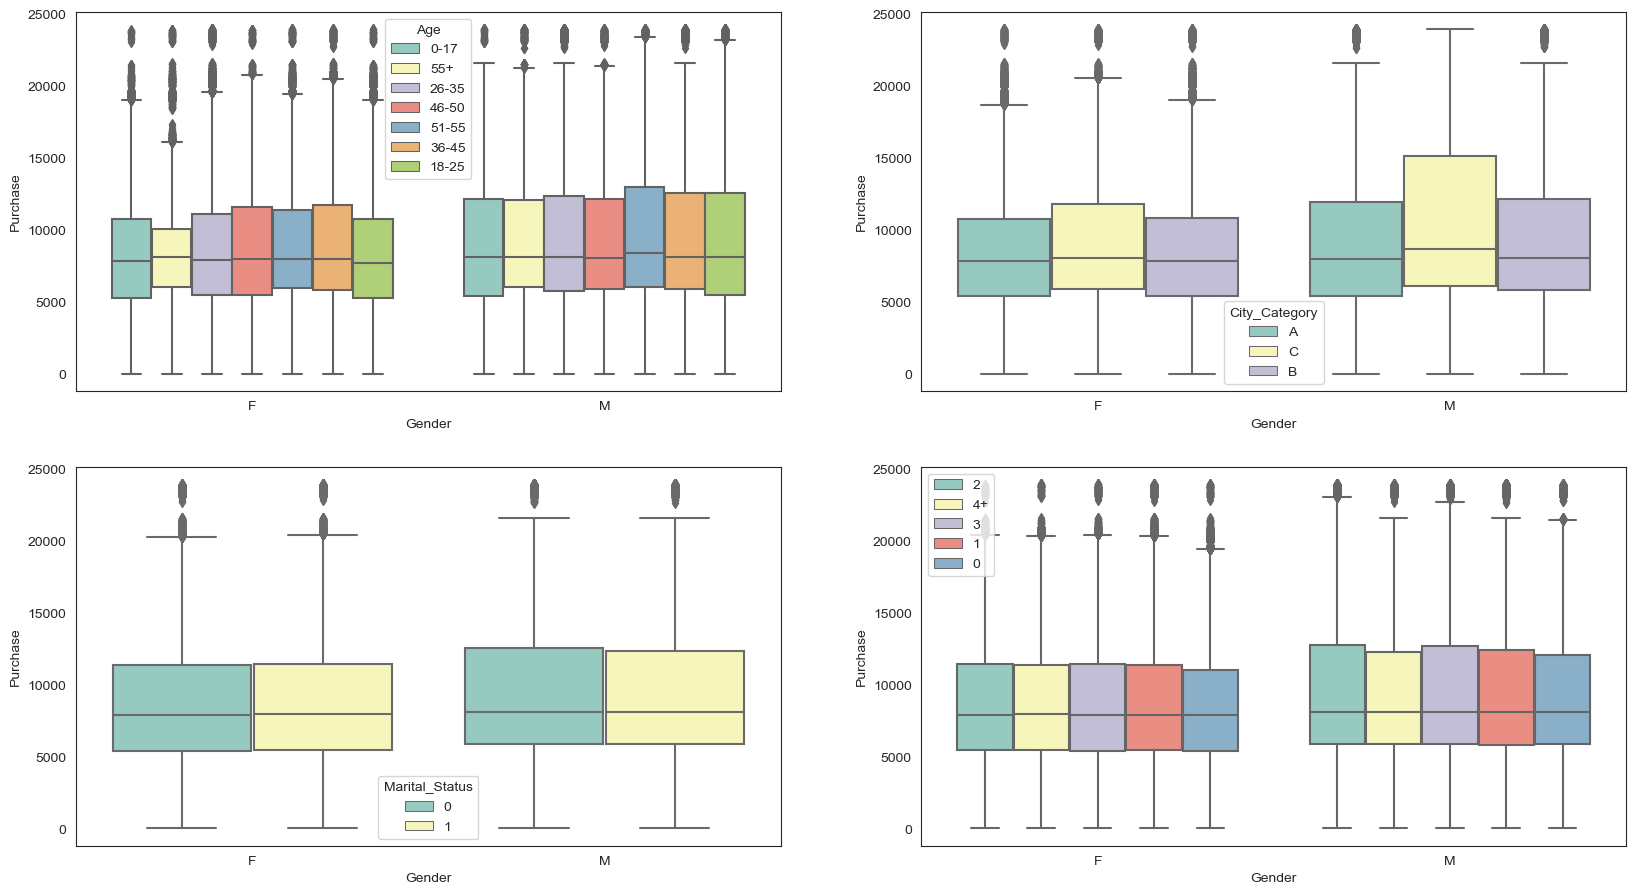

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=wal_data, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=wal_data, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=wal_data, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=wal_data, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

#### Average amount spend per customer for Male and Female

In [ ]:
amt = wal_data.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt = amt.reset_index()
amt

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
# Gender wise value counts in avg_amt_df
amt['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

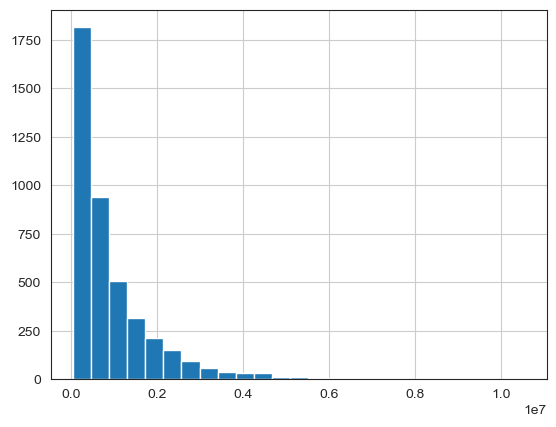

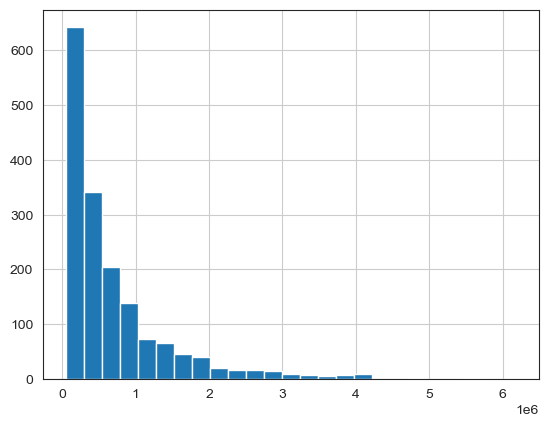

In [ ]:
# histogram of average amount spend for each customer - Male & Female
amt[amt['Gender']=='M']['Purchase'].hist(bins=25)
plt.show()

amt[amt['Gender']=='F']['Purchase'].hist(bins=25)
plt.show()

In [ ]:
male = amt[amt['Gender']=='M']['Purchase'].mean()
female = amt[amt['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male: {:.2f}".format(male))
print("Average amount spend by Female: {:.2f}".format(female))

Average amount spend by Male: 925344.40
Average amount spend by Female: 712024.39


* Male spending more money as compare to female

In [ ]:
male = amt[amt['Gender']=='M']
female = amt[amt['Gender']=='F']

In [ ]:
genders = ["M", "F"]

male_sample_size = 2500
female_sample_size = 1200
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

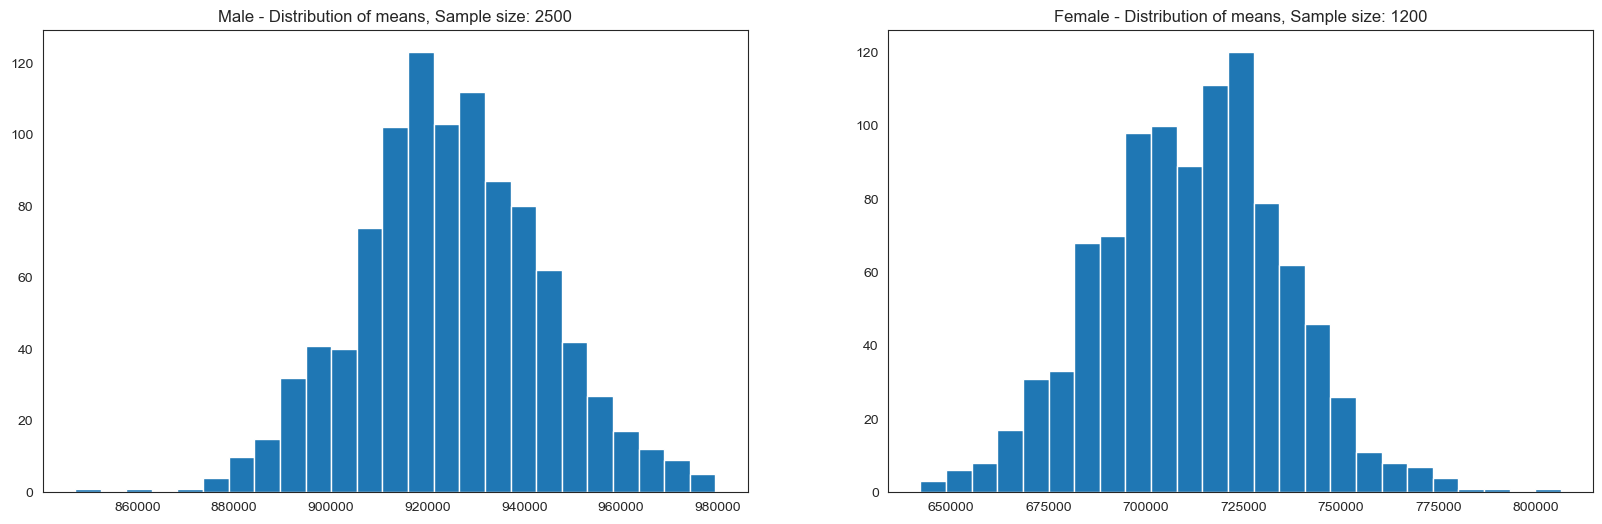

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=25)
axis[1].hist(female_means, bins=25)
axis[0].set_title("Male - Distribution of means, Sample size: 2500")
axis[1].set_title("Female - Distribution of means, Sample size: 1200")

plt.show()

In [ ]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male['Purchase'].mean(), male['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female['Purchase'].mean(), female['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 924457.49
Population mean - Mean of sample means of amount spend for Female: 711920.65

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


* By Central Limit Theorem we can say That ;-
* Average amount spend by male customers is 9,26,341.86
* Average amount spend by female customers is 7,11,704.09

In [ ]:
male_margin_of_error_clt = 1.96*male['Purchase'].std()/np.sqrt(len(male))
male_sample_mean = male['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female['Purchase'].std()/np.sqrt(len(female))
female_sample_mean = female['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


1.Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2.Average amount spend by female customer will lie in between: (673254.77, 750794.02)

#### Doing the same activity for married vs unmarried

In [ ]:
amt = wal_data.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt = amt.reset_index()
amt

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
amt['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

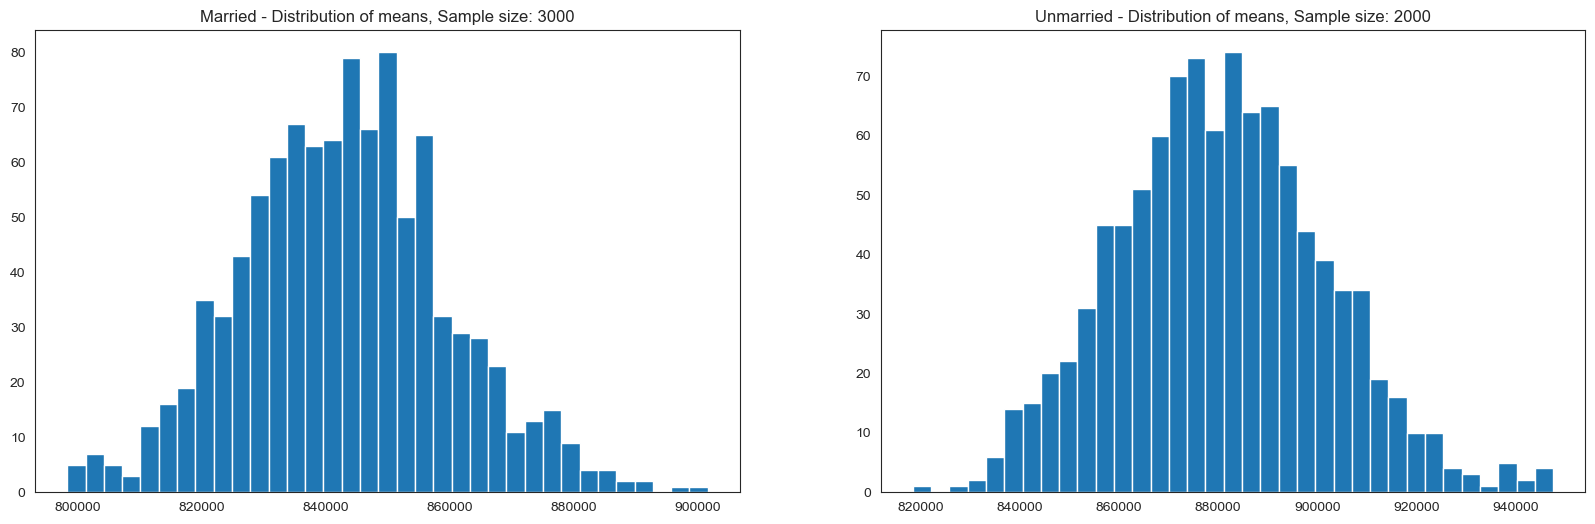

Population mean - Mean of sample means of amount spend for Married: 843098.24
Population mean - Mean of sample means of amount spend for Unmarried: 880508.88

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [ ]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt[amt['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt[amt['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt[amt['Marital_Status']==1]['Purchase'].mean(), amt[amt['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt[amt['Marital_Status']==0]['Purchase'].mean(), amt[amt['Marital_Status']==0]['Purchase'].std()))

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt[amt['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


#### Calculating the average amount spent by Age

In [ ]:
amt = wal_data.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt = amt.reset_index()
amt

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [ ]:
amt['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt[amt['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt[amt['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


### Insights
* ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
* 75% of the users are Male and 25% are Female
* 60% Single, 40% Married
* 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
* Total of 20 product categories are there
* There are 20 differnent types of occupations in the city

* Most of the users are Male
* There are 20 different types of Occupation and Product_Category
* More users belong to B City_Category
* More users are Single as compare to Married
* Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

* Average amount spend by Male customers: 925344.40
* Average amount spend by Female customers: 712024.39

Confidence Interval by Gender
Now using the Central Limit Theorem for the population:

1. Average amount spend by male customers is 9,26,341.86
2. Average amount spend by female customers is 7,11,704.09

Now we can infer about the population that, 95% of the times:

1. Average amount spend by male customer will lie in between: (895617.83, 955070.97)
2. Average amount spend by female customer will lie in between: (673254.77, 750794.02)

Confidence Interval by Marital_Status¶
1. Married confidence interval of means: (806668.83, 880384.76)
2. Unmarried confidence interval of means: (848741.18, 912410.38)

Confidence Interval by Age


1.For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
2.For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
3.For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
4.For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
5.For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
6.For age 55+ --> confidence interval of means: (476948.26, 602446.23)
7.For age 0-17 --> confidence interval of means: (527662.46, 710073.17)

Recommendations


1. Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4. Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
5. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.